# Helicopter Escapes Analysis

## Background
Multiple prison escapes involving helicopters have captivated the world. Joel David Kaplan escaped Santa Martha Acatitla prison in Mexico in 1971, writing a book about his experience. France has had 11 helicopter escape attempts, including Michel Vaujour's wife rescuing him in 1986. Pascal Payet holds the record for most helicopter escapes (2001, 2003, 2007), while Vassilis Palaiokostas escaped twice in 2009. Prisons now employ nets or cables to prevent such escapes. These incidents highlight the ongoing need for enhanced prison security.

## Objective
Using the dataset of helicopter prison ecapes found here, https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes#Actual_attempts, answer the follwing questions about the dataset:

    1.In which year did the most helicopter prison break attempts occur?
    2.In which country did the most attempted helicopter prison escapes occur?
    3.In which country did the least attempted helicopter prison escapes occur?


## Import Modules

In [1]:
!pip install requests


[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install bs4


[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install pandas


[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [28]:
!pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/7e/2c/1e25437f4419f2828bbd213be42c8fd23a3b795c5c4bb776987d177fc615/matplotlib-3.7.2-cp311-cp311-macosx_10_12_x86_64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/92/4d/fe7a7098d98a8889252105193f5e869532f9dc37e39d917a82d2b0b874a1/contourpy-1.1.0-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/e8/e0/d1a65471a945b0764ee17ce4afb59af8761b33c4418ca35687639315fcb7/fonttools-4.42.0-cp311-cp311-macosx_10_9_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 2.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.6 MB/s eta 0:00:00
  Obtaining dependency information for pillow>=6.2.0 from https://files.pythonhosted.org/packages/7a/54/f6a14d95cba8ff082c550d836c9e5c23f1641d2ac291

In [30]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

## Import Data

In [5]:
def data_from_url(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.text
    else:
        return None

url = "https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes"
data = data_from_url(url)

Preview the first 5 rows to see what the data looks like

In [7]:
data1 = BeautifulSoup(data, 'html.parser')
prettyData = data1.prettify()
print(prettyData)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of helicopter prison escapes - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled";(function(){var cookie=document.co

In [8]:
all_table = data1.find_all('table')
#print(all_table[1])
single_table = all_table[1]

<table class="wikitable sortable" style="width:100%;">
<tbody><tr>
<th style="width:11%;">Date</th>
<th style="width:14%;">Prison name</th>
<th style="width:5%;">Country</th>
<th style="width:5%;">Succeeded</th>
<th class="unsortable" style="width:15%;">Escapee(s)</th>
<th class="unsortable" style="width:55%;">Details
</th></tr>
<tr>
<td><span data-sort-value="1971-07-19 !">August 19, 1971</span>
</td>
<td>Santa Martha Acatitla
</td>
<td><span class="flagicon"><span class="mw-image-border" typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="560" data-file-width="980" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Flag_of_Mexico.svg/23px-Flag_of_Mexico.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Flag_of_Mexico.svg/35px-Flag_of_Mexico.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Flag_of_Mexico.svg/46px-Flag_of_Mexico.svg.png 2x" width="23"/></span></span> </span><a href="/wiki/Me

In [9]:
#separate <td>
td_all = single_table.find_all('td')
print(td_all)

[<td><span data-sort-value="1971-07-19 !">August 19, 1971</span>
</td>, <td>Santa Martha Acatitla
</td>, <td><span class="flagicon"><span class="mw-image-border" typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="560" data-file-width="980" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Flag_of_Mexico.svg/23px-Flag_of_Mexico.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Flag_of_Mexico.svg/35px-Flag_of_Mexico.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Flag_of_Mexico.svg/46px-Flag_of_Mexico.svg.png 2x" width="23"/></span></span> </span><a href="/wiki/Mexico" title="Mexico">Mexico</a>
</td>, <td style="background-color: #CEF2CE;">Yes
</td>, <td><span data-sort-value="Kaplan, Joel David"><span class="vcard"><span class="fn">Joel David Kaplan</span></span></span>
<p><span data-sort-value="Contreras Castro, Carlos Antonio"><span class="vcard"><span class="fn">Carlos Antonio Contreras

In [10]:
for i in range(0,6):
    print(td_all[i].text)
    print()

August 19, 1971


Santa Martha Acatitla


 Mexico


Yes


Joel David Kaplan
Carlos Antonio Contreras Castro



Joel David Kaplan was a New York businessman who had been arrested for murder in 1962 in Mexico City and was incarcerated at the Santa Martha Acatitla prison in the Iztapalapa borough of Mexico City.  Joel's sister, Judy Kaplan, arranged the means to help Kaplan escape, and on August 19, 1971, a helicopter landed in the prison yard. The guards mistakenly thought this was an official visit. In two minutes, Kaplan and his cellmate Carlos Antonio Contreras, a Venezuelan counterfeiter, were able to board the craft and were piloted away, before any shots were fired.[9] Both men were flown to Texas and then different planes flew Kaplan to California and Contreras to Guatemala.[3]  The Mexican government never initiated extradition proceedings against Kaplan.[9] The escape is told in a book, The 10-Second Jailbreak: The Helicopter Escape of Joel David Kaplan.[4] It also inspired the 

In [11]:
td_all[6].text

'October 31, 1973\n'

In [12]:
td_all[6].text[:-1]

'October 31, 1973'

In [13]:
#create dictionary to hold data
date = []
prison = []
country = []
succeeded = []
escapee = []

In [14]:
#add details from td to corresponding 
i=0
y=0
for items in td_all:
    y+= 1
    print("y =",y)
    print("i =",i)
          
    if i-(y-1)*6 == 0:
        date.append(td_all[i].text[:-1])
        print("the date is:",td_all[i].text)
        print('date:',date)
        i+= 1
        y-= 1
    elif i==1 or i-(y-1)*6 == 1 :
        prison.append(td_all[i].text[:-1])
        print("the prison escaped is:",td_all[i].text)
        i+= 1
        y-= 1
    elif i==2 or i-(y-1)*6  == 2:
        country.append(td_all[i].text[1:-1])
        print("the country is:", td_all[i].text)
        i += 1
        y-= 1
    elif i==3 or i-(y-1)*6  == 3:
        succeeded.append(td_all[i].text[:-1])
        print("did the prisoner succeeded:",td_all[i].text)
        i += 1
        y-= 1
    elif i==4 or i-(y-1)*6  == 4:
        escapee.append(td_all[i].text[:-1])
        print("the name of the escaper is:",td_all[i].text)
        i += 2
        y-= 1
        print()

        
        

y = 1
i = 0
the date is: August 19, 1971

date: ['August 19, 1971']
y = 1
i = 1
the prison escaped is: Santa Martha Acatitla

y = 1
i = 2
the country is:  Mexico

y = 1
i = 3
did the prisoner succeeded: Yes

y = 1
i = 4
the name of the escaper is: Joel David Kaplan
Carlos Antonio Contreras Castro



y = 1
i = 6
y = 2
i = 6
the date is: October 31, 1973

date: ['August 19, 1971', 'October 31, 1973']
y = 2
i = 7
the prison escaped is: Mountjoy Jail

y = 2
i = 8
the country is:  Ireland

y = 2
i = 9
did the prisoner succeeded: Yes

y = 2
i = 10
the name of the escaper is: JB O'Hagan
Seamus TwomeyKevin Mallon



y = 2
i = 12
y = 3
i = 12
the date is: May 24, 1978

date: ['August 19, 1971', 'October 31, 1973', 'May 24, 1978']
y = 3
i = 13
the prison escaped is: United States Penitentiary, Marion

y = 3
i = 14
the country is:  United States

y = 3
i = 15
did the prisoner succeeded: No

y = 3
i = 16
the name of the escaper is: Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson



In [15]:
print(escapee)

['Joel David Kaplan\nCarlos Antonio Contreras Castro\n', "JB O'Hagan\nSeamus TwomeyKevin Mallon\n", 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson', 'Gérard DupréDaniel Beaumont', 'Marina Paquet (hijacker)Giles Arseneault (prisoner)', 'David McMillan', 'James Rodney LeonardWilliam Douglas BallewJesse Glenn Smith', 'José Carlos dos Reis Encina, a.k.a. "Escadinha"', 'Michel Vaujour', 'Samantha Lopez', 'André BellaïcheGianluigi EspositoLuciano  Cipollari', 'Sydney DraperJohn Kendall', 'Mahoney Danny Francis MitchellRandy Lackey', 'Ben Kramer', 'Ralph BrownFreddie Gonzales', 'Robert FordDavid Thomas', 'William Lane', '—', '—', 'Michel Vaujour', 'Four members of the Manuel Rodriguez Patriotic Front', '—', 'John Killick', 'Steven Whitsett', '—', 'Pascal Payet', 'Abdelhamid CarnousEmile Forma-SariJean-Philippe Lecase', '—', '—', 'Orlando Cartagena Jose Rodriguez Victor Diaz Hector Diaz Jose Tapia', 'Eric AlboreoFranck PerlettoMichel Valero', '—', 'Hubert SellesJean-Claude M

In [16]:
len(date)

48

In [17]:
prison_df = pd.DataFrame()
prison_df = prison_df.assign(date = date,prison= prison, country= country, succeeded= succeeded, escapee=escapee)
prison_df.head()

,date,prison,country,succeeded,escapee
0,"August 19, 1971",Santa Martha Acatitla,Mexico,Yes,Joel David Kaplan\nCarlos Antonio Contreras Ca...
1,"October 31, 1973",Mountjoy Jail,Ireland,Yes,JB O'Hagan\nSeamus TwomeyKevin Mallon\n
2,"May 24, 1978","United States Penitentiary, Marion",United States,No,Garrett Brock TrapnellMartin Joseph McNallyJam...
3,"February 27, 1981","Fleury-Mérogis, Essonne, Ile de France",France,Yes,Gérard DupréDaniel Beaumont
4,"May 7, 1981","Orsainville Prison, Quebec City",Canada,No,Marina Paquet (hijacker)Giles Arseneault (pris...


## Find the year with the most breakout attempts 

In [18]:
#add year to dataframe
prison_df['year'] = prison_df['date'].str[-4:]
prison_df.head()

str

In [19]:
#find min/max year in 'year'
high = max(prison_df['year'])
low = min(prison_df['year'])
print('the high is:',high,', and the low is:', low)

the high is: 2020 , and the low is: 1971


In [20]:
years = []
for year in range(int(low), int(high) + 1):
    years.append(year)
print(years)

[1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [21]:
#create tuple to be used as a counter
attempts_per_year = []
for year in years:
    attempts_per_year.append([year, 0])

In [24]:
#begin counter to find the amount of years that exist
for row in prison_df['year']:
    for year_attempt in attempts_per_year:
        print('the year is:',row)
        year = str(year_attempt[0])
        print('the current year is:',year)
        if row == year:
            year_attempt[1] += 1
              

the year is: 1971
the current year is: 1971
the year is: 1971
the current year is: 1972
the year is: 1971
the current year is: 1973
the year is: 1971
the current year is: 1974
the year is: 1971
the current year is: 1975
the year is: 1971
the current year is: 1976
the year is: 1971
the current year is: 1977
the year is: 1971
the current year is: 1978
the year is: 1971
the current year is: 1979
the year is: 1971
the current year is: 1980
the year is: 1971
the current year is: 1981
the year is: 1971
the current year is: 1982
the year is: 1971
the current year is: 1983
the year is: 1971
the current year is: 1984
the year is: 1971
the current year is: 1985
the year is: 1971
the current year is: 1986
the year is: 1971
the current year is: 1987
the year is: 1971
the current year is: 1988
the year is: 1971
the current year is: 1989
the year is: 1971
the current year is: 1990
the year is: 1971
the current year is: 1991
the year is: 1971
the current year is: 1992
the year is: 1971
the current ye

In [25]:
print(attempts_per_year) 

[[1971, 1], [1972, 0], [1973, 1], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 1], [1979, 0], [1980, 0], [1981, 2], [1982, 0], [1983, 1], [1984, 0], [1985, 2], [1986, 3], [1987, 1], [1988, 1], [1989, 2], [1990, 1], [1991, 1], [1992, 2], [1993, 1], [1994, 0], [1995, 0], [1996, 1], [1997, 1], [1998, 0], [1999, 1], [2000, 2], [2001, 3], [2002, 2], [2003, 1], [2004, 0], [2005, 2], [2006, 1], [2007, 3], [2008, 0], [2009, 3], [2010, 1], [2011, 0], [2012, 1], [2013, 2], [2014, 1], [2015, 0], [2016, 1], [2017, 0], [2018, 1], [2019, 0], [2020, 1]]


Now we create a bar chart to visualize the data 

In [39]:
#unzip attempts_per_year
year, qty = zip(*attempts_per_year)
print(year)
print(qty)
type(qty)

(1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020)
(1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 2, 3, 1, 1, 2, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 2, 3, 2, 1, 0, 2, 1, 3, 0, 3, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1)


tuple

<BarContainer object of 50 artists>

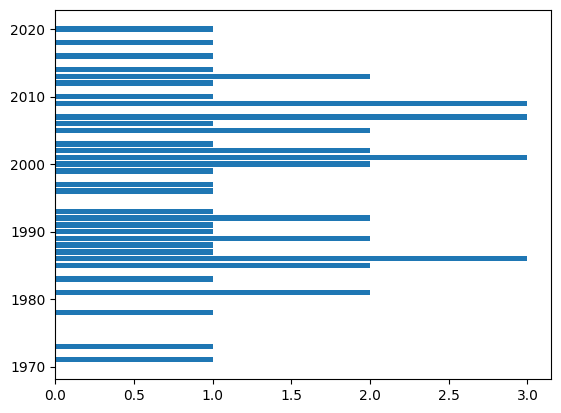

In [42]:
%matplotlib inline
plt.barh(year,qty)

From the bar chart we can see that the years with the most breakouts were 1986, 2001, 2007, and 2009. There was a total of three attempts each

## Find the country with the most and least breakout attempts 

In [49]:
countries = prison_df['country'].unique()
print(countries)

['Mexico' 'Ireland' 'United States' 'France' 'Canada' 'Australia' 'Brazil'
 'Italy' 'United Kingdom' 'Puerto Rico' 'Chile' 'Netherlands' 'Greece'
 'Belgium' 'Russia']


In [69]:
countries_frequency = prison_df['country'].value_counts()
print(countries_frequency)

country
France            15
United States      8
Canada             4
Greece             4
Belgium            4
Australia          2
Brazil             2
United Kingdom     2
Mexico             1
Ireland            1
Italy              1
Puerto Rico        1
Chile              1
Netherlands        1
Russia             1
Name: count, dtype: int64


<BarContainer object of 15 artists>

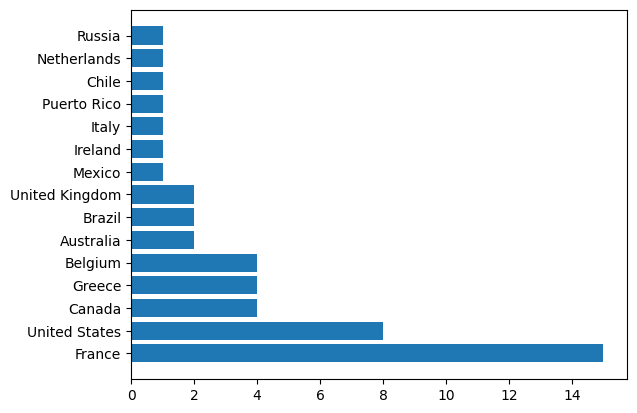

In [73]:
plt.barh(countries_frequency.index, countries_frequency)

The country with the most prison escape attempts is France and the country with the least escape attempts is a tie between Russia, Netherlands, Chile, Puerto Rico, Italy, Ireland, and Mexico